In [ ]:
from langchain_community.llms import Replicate
import os
from google.colab import userdata
# Set the API token
api_token = userdata.get('capstoneproject')
os.environ["REPLICATE_API_TOKEN"] = api_token
# Model setup
model = "ibm-granite/granite-3.3-8b-instruct"
output = Replicate(
model=model,
replicate_api_token=api_token,
)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Electric_Vehicle_Population_Data.csv to Electric_Vehicle_Population_Data.csv


In [ ]:
import pandas as pd
data = pd.read_csv('Electric_Vehicle_Population_Data.csv')
data

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1E65N,Yakima,Granger,WA,98932.0,2022,TESLA,MODEL S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,15.0,187279214,POINT (-120.1871 46.33949),PACIFICORP,5.307700e+10
1,KNDC3DLC5N,Yakima,Yakima,WA,98902.0,2022,KIA,EV6,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,15.0,210098241,POINT (-120.52041 46.59751),PACIFICORP,5.307700e+10
2,5YJYGDEEXL,Snohomish,Everett,WA,98208.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,44.0,121781950,POINT (-122.18637 47.89251),PUGET SOUND ENERGY INC,5.306104e+10
3,3C3CFFGE1G,Yakima,Yakima,WA,98908.0,2016,FIAT,500,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,14.0,180778377,POINT (-120.60199 46.59817),PACIFICORP,5.307700e+10
4,KNDCC3LD5K,Kitsap,Bremerton,WA,98312.0,2019,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26.0,0.0,26.0,2581225,POINT (-122.65223 47.57192),PUGET SOUND ENERGY INC,5.303508e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250654,7SAYGDEE7S,Franklin,Pasco,WA,99301.0,2025,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,9.0,274986323,POINT (-119.09467 46.23542),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF F...,5.302102e+10
250655,2C4RC1L77J,Pierce,Tacoma,WA,98407.0,2018,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,33.0,0.0,27.0,128901748,POINT (-122.51134 47.29238),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305306e+10
250656,7SAYGDEF6P,Pierce,Bonney Lake,WA,98391.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,31.0,258537660,POINT (-122.17144 47.19175),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
250657,WBY8P6C54K,King,Seattle,WA,98117.0,2019,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,153.0,0.0,36.0,477080334,POINT (-122.38418 47.70044),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10



Top 10 EV Manufacturers:
 Make
TESLA        105253
CHEVROLET     18223
NISSAN        16085
FORD          13492
KIA           12171
BMW           10551
TOYOTA        10429
HYUNDAI        8328
RIVIAN         7637
VOLVO          6570
Name: count, dtype: int64


/tmp/ipython-input-3986624316.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_makes.index, y=top_makes.values, palette="viridis")


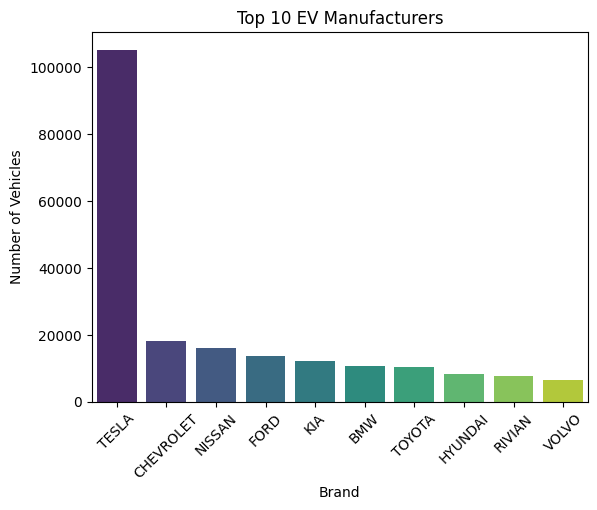


AI Analysis:
 Based on the provided data, here's an analysis of the top 10 electric vehicle (EV) manufacturers by the number of vehicles produced or sold:

1. **Tesla (105,253 vehicles)**
   - **Trend:** Tesla continues to lead the EV market, with a significant gap between them and the second-place manufacturer.
   - **Dominant Reasons:** Tesla's dominance can be attributed to several factors, including early mover advantage, strong brand recognition, advanced technology, extensive Supercharger network, and a diverse product lineup catering to various market segments.

2. **Chevrolet (18,223 vehicles)**
   - **Trend:** Chevrolet ranks second but has a considerably smaller market share compared to Tesla.
   - **Dominant Reasons:** Chevrolet benefits from its long-standing reputation and GM's resources. The Chevrolet Bolt EV and EUV models have contributed to its presence in the EV market. However, Tesla's lead and rapid innovation have made it challenging for Chevrolet to gain signific

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import replicate


top_makes = data['Make'].value_counts().head(10)
print("\nTop 10 EV Manufacturers:\n", top_makes)


plt.figure()
sns.barplot(x=top_makes.index, y=top_makes.values, palette="viridis")
plt.title("Top 10 EV Manufacturers")
plt.xlabel("Brand")
plt.ylabel("Number of Vehicles")
plt.xticks(rotation=45)
plt.show()


analysis_input = top_makes.to_string()


prompt = f"""
You are a professional EV market analyst. Analyze the following data which shows
the Top 10 Electric Vehicle Manufacturers by number of vehicles.
Explain key trends, highlight the leading brands, and provide possible reasons
for their market dominance.

Data:
{analysis_input}
"""


output = replicate.run(
    "ibm-granite/granite-3.3-8b-instruct",
    input={"prompt": prompt, "max_new_tokens": 250}
)


print("\nAI Analysis:\n", "".join(output))


Number of EVs per Production Year:
 Model Year
2000        8
2002        2
2003        1
2008       19
2010       24
2011      637
2012     1447
2013     4140
2014     3341
2015     4592
2016     5288
2017     8757
2018    14555
2019    11024
2020    12338
2021    20713
2022    29281
2023    59273
2024    49710
2025    23319
2026     2190
Name: count, dtype: int64


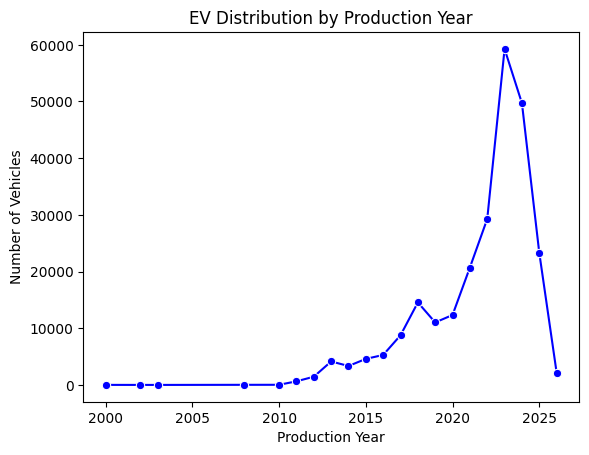


AI Analysis:
 Based on the provided data, several trends and observations can be made:

1. **General Trend**: There is a clear upward trend in electric vehicle (EV) production from 2000 to 2023, with significant acceleration starting from 2010. This suggests a growing interest and investment in EVs over time, likely driven by environmental concerns, technological advancements, and policy incentives.

2. **Peak Years**: 
   - 2023 stands out with 59,273 units, marking the highest production year so far. This peak could be attributed to increased demand due to heightened environmental awareness, improvements in battery technology, and government policies promoting EV adoption.
   - 2013 (4,140) and 2014 (3,341) also show relatively high production numbers, possibly influenced by early signs of growing consumer interest and advancements in EV technology.

3. **Decline in 2025 and 2026**: The sharp decline in 2025 (23,319) and 2026 (2,190) might be due to several factors:
   - Economic sl

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import replicate


year_counts = data['Model Year'].value_counts().sort_index()
print("\nNumber of EVs per Production Year:\n", year_counts)


plt.figure()
sns.lineplot(x=year_counts.index, y=year_counts.values, marker="o", color="blue")
plt.title("EV Distribution by Production Year")
plt.xlabel("Production Year")
plt.ylabel("Number of Vehicles")
plt.show()


analysis_input = year_counts.to_string()


prompt = f"""
You are an expert data analyst. The following data shows the number of
electric vehicles per production year. Identify trends, peak years,
and possible reasons for the growth or decline.

Data:
{analysis_input}
"""


output = replicate.run(
    "ibm-granite/granite-3.3-8b-instruct",
    input={"prompt": prompt, "max_new_tokens": 250}
)


print("\nAI Analysis:\n", "".join(output))


Top 5 Counties with the Most EVs:
 County
King         124211
Snohomish     31031
Pierce        20829
Clark         15279
Thurston       9175
Name: count, dtype: int64


/tmp/ipython-input-2930721016.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_county.index, y=top_county.values, palette="magma")


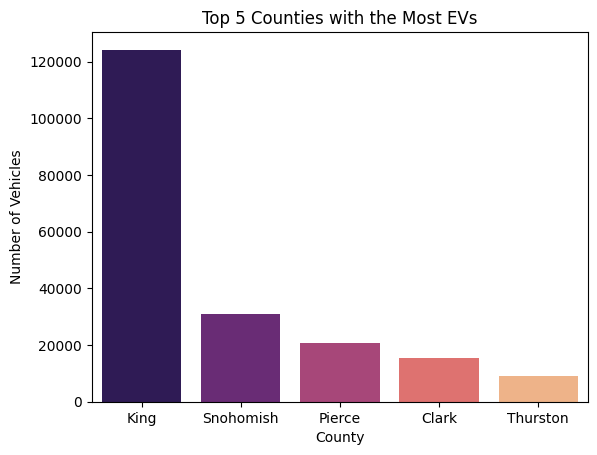


AI Analysis:
 Based on the provided data, the top five counties with the highest number of registered electric vehicles (EVs) are King, Snohomish, Pierce, Clark, and Thurston in Washington State. Here are some insights into regional adoption trends, possible reasons for concentration, and implications of these results:

1. **Regional Adoption Trends**: The data suggests a clear concentration of EV adoption in urban and suburban areas surrounding Seattle, with King County leading the pack. This indicates that larger, more populous counties are driving EV adoption. The presence of Seattle, the state's largest city, in King County likely contributes to this trend, as urban areas often exhibit higher EV adoption rates due to factors such as greater environmental awareness, better infrastructure, and more access to charging stations.

2. **Possible Reasons for Concentration**:
   - **Population Density**: Higher population density in these counties likely leads to increased demand for EVs,

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import replicate


top_county = data['County'].value_counts().head(5)
print("\nTop 5 Counties with the Most EVs:\n", top_county)


plt.figure()
sns.barplot(x=top_county.index, y=top_county.values, palette="magma")
plt.title("Top 5 Counties with the Most EVs")
plt.xlabel("County")
plt.ylabel("Number of Vehicles")
plt.show()



analysis_input = top_county.to_string()


prompt = f"""
You are a data analyst. The following data shows the Top 5 Counties with
the highest number of registered electric vehicles. Provide insights in English
about regional adoption trends, possible reasons for concentration,
and what these results might imply.

Data:
{analysis_input}
"""


output = replicate.run(
    "ibm-granite/granite-3.3-8b-instruct",
    input={"prompt": prompt, "max_new_tokens": 250}
)

print("\nAI Analysis:\n", "".join(output))


Top 10 EV Models:
 Model
MODEL Y           51903
MODEL 3           37334
LEAF              13959
MODEL S            7883
BOLT EV            7598
MODEL X            6660
MUSTANG MACH-E     5472
ID.4               5252
WRANGLER           4706
IONIQ 5            4682
Name: count, dtype: int64


/tmp/ipython-input-631607987.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_models.index, y=top_models.values, palette="cubehelix")


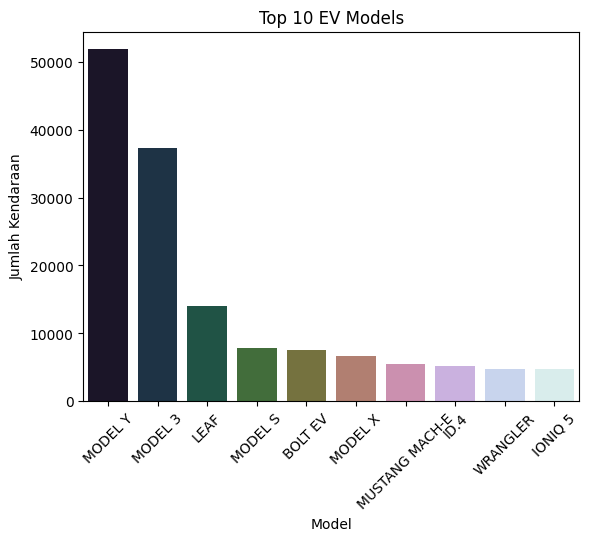


AI Analysis:
 The data reveals the top 10 electric vehicle (EV) models by registration count, providing valuable insights into consumer preferences and market dominance in the EV sector.

1. **Tesla Model Y** leads the pack with an impressive 51,903 registrations, demonstrating its overwhelming popularity. This success can be attributed to Tesla's strong brand reputation, extensive Supercharger network, and continuous improvements in technology and range. The Model Y's versatility as a compact SUV also appeals to a broad consumer base.

2. **Tesla Model 3** follows closely with 37,334 registrations, showcasing Tesla's consistent market presence. Its appeal stems from its affordability compared to other Tesla models, sporty performance, and strong brand loyalty.

3. **Nissan Leaf**, with 13,959 registrations, remains a significant player in the EV market, particularly due to its early entry and widespread availability. The Leaf's affordability and proven reliability have helped it main

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import replicate


top_models = data['Model'].value_counts().head(10)
print("\nTop 10 EV Models:\n", top_models)


plt.figure()
sns.barplot(x=top_models.index, y=top_models.values, palette="cubehelix")
plt.title("Top 10 EV Models")
plt.ylabel("Jumlah Kendaraan")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.show()


analysis_input = top_models.to_string()


prompt = f"""
You are an EV market analyst. The following data shows the Top 10 Electric Vehicle Models
by number of registrations. Provide insights in English about the most popular models,
their market dominance, and what this trend suggests about consumer preferences.

Data:
{analysis_input}
"""


output = replicate.run(
    "ibm-granite/granite-3.3-8b-instruct",
    input={"prompt": prompt, "max_new_tokens": 250}
)

# Tampilkan hasil analisis Granite
print("\nAI Analysis:\n", "".join(output))

In [ ]:
top_makes = data['Make'].value_counts().head(10)
year_counts = data['Model Year'].value_counts().sort_index()
top_county = data['County'].value_counts().head(5)
top_models = data['Model'].value_counts().head(10)


prompt = f"""
You are an assistant analyzing Electric Vehicle (EV) dataset.
Based on the data:
- Manufacturer with the most EVs: {top_makes.index[0]} with {top_makes.iloc[0]} units
- Year with the most EVs: {year_counts.idxmax()} with {year_counts.max()} units
- County with the most EVs: {top_county.index[0]} with {top_county.iloc[0]} units
- Most popular EV model: {top_models.index[0]} with {top_models.iloc[0]} units

Write a short summary of these insights in clear English, as if presenting analysis results.
"""


response = output.invoke(prompt)


print("=== AI-Generated Insights (IBM Granite) ===\n")
print(response)

=== AI-Generated Insights (IBM Granite) ===

Based on our analysis of the Electric Vehicle (EV) dataset, several key insights stand out:

1. **Manufacturer Leadership**: Tesla emerges as the leading manufacturer in the EV market, accounting for 105,253 units. This significant figure underscores Tesla's dominance in the industry, highlighting its substantial contribution to EV adoption.

2. **Annual Growth**: The year 2023 marks a pivotal moment, with a record-breaking total of 59,273 units sold. This data point indicates a robust and expanding market, suggesting strong consumer interest and potentially effective industry strategies.

3. **Geographical Hotspot**: Among the counties, King County leads with an impressive 124,211 units, illustrating a localized concentration of EV ownership. This could reflect regional policies encouraging EV use, higher environmental awareness, or better infrastructure support in King County.

4. **Model Preference**: The Tesla Model Y has become the most

In [ ]:
from langchain_community.llms import Replicate
import os
from google.colab import userdata


api_token = userdata.get('capstoneproject')
os.environ["REPLICATE_API_TOKEN"] = api_token


model = "ibm-granite/granite-3.3-8b-instruct"
output = Replicate(
    model=model,
    replicate_api_token=api_token,
)

# Build the prompt dynamically from dataset analysis
prompt = f"""
Based on the Electric Vehicle (EV) dataset analysis:
- Most common EV brand: {top_makes.index[0]} with {top_makes.iloc[0]} units
- Most common production year: {year_counts.idxmax()} with {year_counts.max()} units
- Location with the highest EV adoption: {top_county.index[0]} with {top_county.iloc[0]} units
- Most popular EV model: {top_models.index[0]} with {top_models.iloc[0]} units

Please provide 3 actionable recommendations for:
1. EV Manufacturers
2. Government/Local Authorities
3. Consumers

Answer shortly and clearly in bullet points, using English.
"""


response = output.invoke(prompt)


print("=== Recommendations (IBM Granite AI) ===\n")
print(response)

=== Recommendations (IBM Granite AI) ===

1. EV Manufacturers:
   - Focus on enhancing Model Y production to meet the high demand, potentially investing in automation and expanding manufacturing capacity.
   - Explore strategies to increase 2023 production targets, possibly by optimizing supply chains and prioritizing high-selling models.
   - Study King's successful EV adoption strategies and consider implementing similar market-specific approaches in other regions.

2. Government/Local Authorities:
   - Implement incentives, such as tax credits or rebates, targeting Tesla and Model Y to further boost their market share and accelerate EV adoption.
   - Develop infrastructure plans focusing on King and other high-adoption areas, ensuring adequate charging stations and grid support to accommodate growing EV numbers.
   - Collaborate with manufacturers to promote local production and job creation, especially in regions with high EV adoption rates like King.

3. Consumers:
   - Prioritize